In [1]:
import pandas as pd
import altair as alt

In [2]:
file = 'aeris-20210401-171039.csv'
df = pd.read_csv(file, infer_datetime_format=True, parse_dates=True, index_col='datetime')

In [8]:
def pct(x):
    return np.std(x)/np.mean(x)*100

In [3]:
df['state'] = (df['ssv'].diff() != 0).cumsum()

<AxesSubplot:xlabel='datetime'>

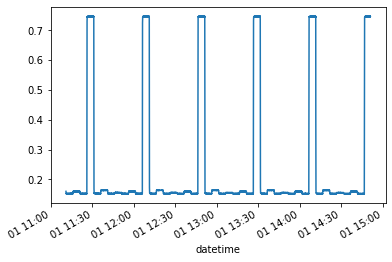

In [4]:
df.co.plot()

In [35]:
df2 = df.groupby(['state']).apply(lambda x: x.iloc[x.ssv.size//3:]).reset_index(level=0, drop=True)

<AxesSubplot:xlabel='datetime'>

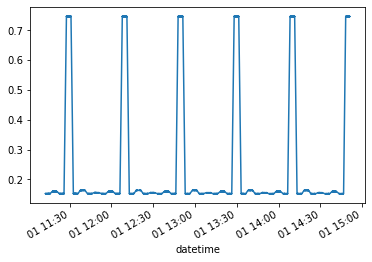

In [42]:
df2.co.plot()

In [40]:
res = df2.groupby(['state', 'seq_count', 'ssv'])[['n2o', 'co']].agg(['mean', 'std', pct, 'count'])

In [41]:
res

n2o                                  co            \
                         mean       std       pct count      mean       std   
state seq_count ssv                                                           
1     0         2    0.332537  0.000368  0.110249   195  0.151912  0.000258   
2     0         4    0.616238  0.000463  0.074865   190  0.159109  0.000284   
3     0         2    0.332520  0.000347  0.104164   190  0.151912  0.000257   
4     0         6    0.333774  0.000362  0.108133   186  0.747251  0.000578   
5     0         2    0.332498  0.000356  0.106767   191  0.151979  0.000288   
6     0         8    0.067671  0.000281  0.413964   188  0.163017  0.000251   
7     0         2    0.332412  0.000322  0.096574   186  0.151934  0.000267   
8     0         10   0.332753  0.000346  0.103557   187  0.155154  0.000272   
9     1         2    0.332479  0.000328  0.098532   186  0.151919  0.000217   
10    1         4    0.616355  0.000457  0.074007   189  0.159148  0.000260   
11    1         2    0.332702  0.000328  0.098457   188  0.151902  0.000261   
12    1         6    0.333898  0.000347  0.103553   190  0.747099  0.000466   
13    1         2    0.332643  0.000382  0.114576   190  0.151892  0.000243   
14    1         8    0.067967  0.000263  0.386320   192  0.162987  0.000224   
15    1         2    0.332723  0.000348  0.104312   194  0.151893  0.000228   
16    1         10   0.333016  0.000361  0.108263   188  0.155089  0.000254   
17    2         2    0.332825  0.000322  0.096346   191  0.151838  0.000227   
18    2         4    0.616608  0.000415  0.067056   190  0.159083  0.000230   
19    2         2    0.332905  0.000336  0.100563   189  0.151807  0.000261   
20    2         6    0.334227  0.000366  0.109304   188  0.747047  0.000494   
21    2         2    0.332838  0.000331  0.099325   189  0.151892  0.000238   
22    2         8    0.068168  0.000301  0.441033   186  0.163004  0.000255   
23    2         2    0.332863  0.000348  0.104280   195  0.151882  0.000240   
24    2         10   0.333116  0.000345  0.103235   191  0.155021  0.000219   
25    3         2    0.332849  0.000329  0.098596   190  0.151864  0.000248   
26    3         4    0.616722  0.000465  0.075206   188  0.159101  0.000238   
27    3         2    0.332993  0.000345  0.103347   190  0.151844  0.000227   
28    3         6    0.334247  0.000362  0.108072   189  0.747051  0.000487   
29    3         2    0.332973  0.000362  0.108525   191  0.151844  0.000255   
30    3         8    0.068214  0.000283  0.413949   189  0.162981  0.000241   
31    3         2    0.332936  0.000348  0.104322   190  0.151826  0.000237   
32    3         10   0.333228  0.000328  0.098036   194  0.155034  0.000237   
33    4         2    0.332988  0.000326  0.097538   189  0.151787  0.000247   
34    4         4    0.616805  0.000446  0.072071   192  0.159037  0.000259   
35    4         2    0.333102  0.000359  0.107612   195  0.151811  0.000248   
36    4         6    0.334417  0.000361  0.107680   193  0.746985  0.000494   
37    4         2    0.333083  0.000358  0.107253   190  0.151837  0.000252   
38    4         8    0.068342  0.000293  0.427268   188  0.162901  0.000249   
39    4         2    0.333051  0.000326  0.097717   189  0.151779  0.000265   
40    4         10   0.333328  0.000358  0.107158   188  0.155011  0.000261   
41    5         2    0.333115  0.000359  0.107557   190  0.151762  0.000232   
42    5         4    0.616959  0.000458  0.074083   190  0.159035  0.000240   
43    5         2    0.333251  0.000340  0.101890   186  0.151753  0.000226   
44    5         6    0.334502  0.000307  0.091521   173  0.746955  0.000451   

                                     
                          pct count  
state seq_count ssv                  
1     0         2    0.169611   195  
2     0         4    0.177993   190  
3     0         2    0.169058   190  
4     0         6    0.077092   186  
5     0         2    0.189134   191  
6     0 

In [27]:
res.co.reset_index().head()

,state,ssv,mean,std,pct,count
0,1,2,0.151912,0.000258,0.169611,195
1,2,4,0.159109,0.000284,0.177993,190
2,3,2,0.151912,0.000257,0.169058,190
3,4,6,0.747251,0.000578,0.077092,186
4,5,2,0.151979,0.000288,0.189134,191


In [47]:
chart = alt.Chart(res.co.reset_index()).mark_circle(size=200).encode(
    x='state',
    y='mean',
    color='ssv:N',
    tooltip=['mean']
)
chart

alt.Chart(...)